<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/AI_ANN_CIFAR10_31_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


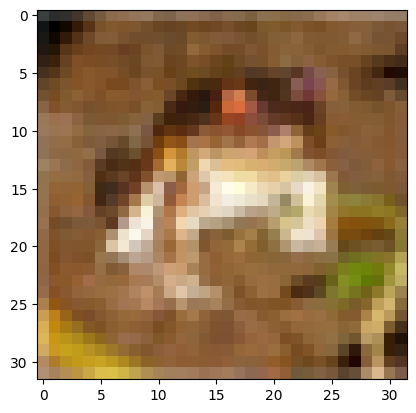

số này là:  [6]


In [5]:
duty = x_train[0]   # Từ 0-60000 giá trị
plt.imshow(duty, cmap= plt.cm.binary)
plt.show()
print('số này là: ', y_train[0])

In [6]:
from keras.models import Sequential
from keras.layers import Dense

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))  #Hàm truyền relu tạo 512 noron trong 1 lop mạng ẩn 28*28,: chỉ có 1 cột dữ liệu
# model.add(Dense(1000,activation='relu'))
# model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [7]:
X = x_test
Y = y_test

In [8]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
print(x_train.shape)

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [9]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
y_train = to_categorical (y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(50000, 10)
(10000, 10)


In [10]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
391/391 [==============================] - 9s 21ms/step - loss: 2.2838 - accuracy: 0.2598
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 1.8011 - accuracy: 0.3566
Epoch 3/10
391/391 [==============================] - 8s 22ms/step - loss: 1.7103 - accuracy: 0.3894
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 1.6560 - accuracy: 0.4106
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 1.6189 - accuracy: 0.4280
Epoch 6/10
391/391 [==============================] - 8s 22ms/step - loss: 1.5884 - accuracy: 0.4355
Epoch 7/10
391/391 [==============================] - 9s 23ms/step - loss: 1.5597 - accuracy: 0.4480
Epoch 8/10
391/391 [==============================] - 8s 20ms/step - loss: 1.5338 - accuracy: 0.4574
Epoch 9/10
391/391 [==============================] - 9s 22ms/step - loss: 1.5162 - accuracy: 0.4653
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.5570 - accurac

In [11]:
model.save('test1.h5')

1/1 [==============================] - 0s 39ms/step


array([2])

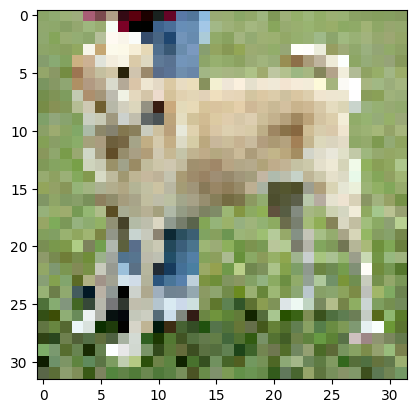

In [15]:
from keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('/content/dog.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=1)